# Plot for Tests conducted per Million population for different Indian States




Datasets can be found here: https://api.covid19india.org/csv/. Their official github page is: https://github.com/covid19india/covid19india-react

Note: State name being used in code is compulsorily same as in datasets' column 'State'

In [ ]:
# Importing basic libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime, timedelta

### Import and Load Datasets
#### Tests State-wise
In link provided above one can see various datasets in form of comma separated files(csv), we will import for Tests Datewise for States
 *'statewise_tested_numbers_data.csv'*

In [ ]:
# Getting the testing dataset
df = pd.read_csv('https://api.covid19india.org/csv/latest/statewise_tested_numbers_data.csv')
df.head()

,Updated On,State,Total Tested,Tag (Total Tested),Positive,Negative,Unconfirmed,Cumulative People In Quarantine,Total People Currently in Quarantine,Tag (People in Quarantine),...,Corona Enquiry Calls,Num Calls State Helpline,Source1,Unnamed: 20,Source2,Test positivity rate,Tests per thousand,Tests per million,Tests per positive case,Population NCP 2019 Projection
0,17/04/2020,Andaman and Nicobar Islands,1403.0,Samples Sent,12.0,1210.0,181.0,NaN,NaN,NaN,...,NaN,NaN,https://t.me/indiacovid/2550,NaN,NaN,0.86%,3.53,3534.0,117.0,397000.0
1,24/04/2020,Andaman and Nicobar Islands,2679.0,Samples Sent,27.0,NaN,246.0,NaN,614.0,Institutional,...,NaN,280.0,https://t.me/indiacovid/3147?single,NaN,NaN,1.01%,6.75,6748.0,99.0,397000.0
2,27/04/2020,Andaman and Nicobar Islands,2848.0,Samples Sent,33.0,NaN,106.0,NaN,724.0,Institutional,...,NaN,298.0,https://t.me/indiacovid/3365?single,NaN,NaN,1.16%,7.17,7174.0,86.0,397000.0
3,01/05/2020,Andaman and Nicobar Islands,3754.0,Samples Sent,33.0,NaN,199.0,NaN,643.0,Institutional,...,NaN,340.0,https://t.me/indiacovid/3781,NaN,NaN,0.88%,9.46,9456.0,114.0,397000.0
4,16/05/2020,Andaman and Nicobar Islands,6677.0,Samples Sent,33.0,NaN,136.0,NaN,16.0,Institutional,...,NaN,471.0,https://t.me/indiacovid/4925,NaN,NaN,0.49%,16.82,16819.0,202.0,397000.0


In [ ]:
# Filtering in the required columns
df1 = df[['Updated On','State', 'Total Tested', 'Positive']]
df1

,Updated On,State,Total Tested,Positive
0,17/04/2020,Andaman and Nicobar Islands,1403.0,12.0
1,24/04/2020,Andaman and Nicobar Islands,2679.0,27.0
2,27/04/2020,Andaman and Nicobar Islands,2848.0,33.0
3,01/05/2020,Andaman and Nicobar Islands,3754.0,33.0
4,16/05/2020,Andaman and Nicobar Islands,6677.0,33.0
...,...,...,...,...
1594,26/05/2020,West Bengal,157277.0,4009.0
1595,27/05/2020,West Bengal,166513.0,4192.0
1596,28/05/2020,West Bengal,175769.0,4536.0
1597,29/05/2020,West Bengal,185051.0,4813.0


In [ ]:
# Removing the rows with Nan values
refdf1 = df1.dropna()

#### Population
The dataset is in form of table, we will import it directly from the system.

In [ ]:
# Importing states population csv file from local directory
Popdf = pd.read_csv('India States Population.csv')
Popdf.head()

,State,Population
0,Uttar Pradesh,237095024
1,Maharashtra,128466921
2,Bihar,126750326
3,West Bengal,102741588
4,Andhra Pradesh,53206421


### Function for Parsing Data

The tests dataset consist of all states, so we need to separate them as required. 

#### FetchState Function

*Params*: State Name 

*Returns*: Single dataframe of State's datewise cumulative tests value

Checkout the example for 'Himachal Pradesh' state.

In [ ]:
# Function creates a dataframe for a particular state
def fetchState(State):
    
    Statedf = refdf1.loc[refdf1['State'] == State]
        
    return Statedf

In [ ]:
HP = fetchState('Himachal Pradesh')
HP.head()

,Updated On,State,Total Tested,Positive
548,10/04/2020,Himachal Pradesh,900.0,30.0
549,11/04/2020,Himachal Pradesh,900.0,30.0
550,12/04/2020,Himachal Pradesh,1113.0,32.0
551,13/04/2020,Himachal Pradesh,1210.0,32.0
552,14/04/2020,Himachal Pradesh,1311.0,32.0


### Function for creating states TPM Dataframe

*Params*: List of States

*Returns*: Dataframe of the States

The function gives 4 column dataframe with each states' cumulative Tests per million data (last 0/5/10 th day). Function also prints the dataframe

In [ ]:
# Function takes in a list of states and returns a datrame with their Tests per Million conducted in last/last5/ last 10 days 
def Last10day(los):
    
    noc = len(los)
    StateTPMlist = []
    
    # getting the last 0/5/10 days dates
    lastday = (datetime.now() - timedelta(days = 1)).strftime('%d/%m/%Y')
    last5day = (datetime.now() - timedelta(days = 6)).strftime('%d/%m/%Y')
    last10day = (datetime.now() - timedelta(days = 11)).strftime('%d/%m/%Y')
    
    for j in range(noc): 
        
        Statedata = fetchState(los[j])
        
        Statepopulation = (Popdf.loc[Popdf['State'] == los[j]]).iloc[0,1]
                
        TPM1 = (Statedata.loc[Statedata['Updated On'] == lastday]).iloc[0][2]/(Statepopulation/1000000)
        TPM2 = (Statedata.loc[Statedata['Updated On'] == last5day]).iloc[0][2]/(Statepopulation/1000000) 
        TPM3 = (Statedata.loc[Statedata['Updated On'] == last10day]).iloc[0][2]/(Statepopulation/1000000) 
        
        StateTPMlist.append([los[j], TPM1, TPM2, TPM3])
        
        TPMdf = pd.DataFrame(StateTPMlist, columns = ['Name', lastday, last5day, last10day])
    
    print(TPMdf)
    return TPMdf
        

### Function to plot TPM data

*Params*: List of states

*Returns*: None

Function plots the TPM data in form of horizontal lines, with states on y-axis and TPM on x-axis. Special markings have been made for each state for their 3 TPM values for past 0/5/10 dates. 

In [ ]:
# Function takes in the list of states to be plotted
def PlotTPM(loc):
    
    States_Dataframe = Last10day(loc)
    yrange = np.arange(States_Dataframe.shape[0])
    
    fig1, ax1 = plt.subplots(figsize=(18,10))
    
    ax1.hlines(y= yrange, xmin=0, xmax=States_Dataframe.iloc[:,1], color='#007acc', alpha=0.2, linewidth=2)
    
    # plotting all the TPM data points 
    ax1.plot(States_Dataframe.iloc[:,3], yrange, "o", markersize=10, mfc='Green',  label = datetime.strptime(States_Dataframe.columns[3],'%d/%m/%Y').strftime("%d %B") )
    ax1.plot(States_Dataframe.iloc[:,2], yrange, "o", markersize=10, mfc='Yellow', label = datetime.strptime(States_Dataframe.columns[2],'%d/%m/%Y').strftime("%d %B") )
    ax1.plot(States_Dataframe.iloc[:,1], yrange, "o", markersize=10, mfc='Indigo', label = datetime.strptime(States_Dataframe.columns[1],'%d/%m/%Y').strftime("%d %B") )
    
    # showing the TPM value for last day 
    for i in range(len(loc)):
        TPM1 = States_Dataframe.iloc[i][1]
        plt.text(TPM1 + TPM1/10, i, math.ceil(TPM1*100)/100, color='black', fontsize = 12, va = 'center', ha = 'left')
        
    # Plot Formatting
    
    ax1.set_xscale('log')
    ax1.set_xlabel('Tests per Million (log scaling)', fontsize = 14, color = '#333F4B')
    ax1.set_ylabel('')
    ax1.set_title('Test per Million in some Indian States as of ' + datetime.strptime(States_Dataframe.columns[1],'%d/%m/%Y').strftime("%d %B %Y"), fontsize=16, color = '#333F4B') 
    
    ax1.set_xticks([100, 200, 400, 800, 1600, 3200, 6400, 12800])
    ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    ax1.get_xaxis().set_tick_params(which='minor', size=0)
    ax1.get_xaxis().set_tick_params(which='minor', width=0)
    
    ax1.set_yticks(yrange)
    ax1.set_yticklabels(States_Dataframe['Name'], fontsize=14, color = '#333F4B')
    
    ax1.invert_yaxis() 
    ax1.legend(loc="upper right", ncol = 3, fontsize = 14)

    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    
    plt.savefig('TestperMillion.png')
    
    # --- Function Ends Here ---


List of states has been made to pass in the function for plotting. One can add more states and UTs to it (or reduce).

In [ ]:
list_of_states = ['Bihar', 'Uttar Pradesh', 'West Bengal', 
                  'Madhya Pradesh', 'Kerala', 'Punjab', 
                  'Gujarat', 'Odisha', 'Maharashtra', 
                  'Karnataka', 'Rajasthan', 'Tamil Nadu', 
                  'Andhra Pradesh', 'Delhi', 'Jammu and Kashmir']

### Finally the Plot

The plot is preceded by dataframe of the states passed. Also check image of the plot, saved in your system.

                 Name    29/05/2020   24/05/2020   19/05/2020
0               Bihar    570.065595   502.886281   398.918106
1       Uttar Pradesh   1142.664217   968.476673   768.400774
2         West Bengal   1801.130424  1351.195779   995.526758
3      Madhya Pradesh   1806.465838  1579.292032  1353.640698
4              Kerala   2112.976450  1762.379635  1497.253962
5              Punjab   2592.322928  2116.259033  1780.048306
6             Gujarat   2817.052214  2556.810341  2162.609547
7              Odisha   3026.397365  2610.370490  2114.325475
8         Maharashtra   3382.699582  2829.288638  2290.644142
9           Karnataka   3753.620283  2927.988164  2250.832448
10          Rajasthan   4769.055758  3986.423426  3200.195271
11         Tamil Nadu   5639.956992  4951.690030  4208.951636
12     Andhra Pradesh   6650.964176  5719.723189  4857.496429
13              Delhi   9888.032126  8414.283116  7224.555106
14  Jammu and Kashmir  10689.246239  8783.715986  6520.528425


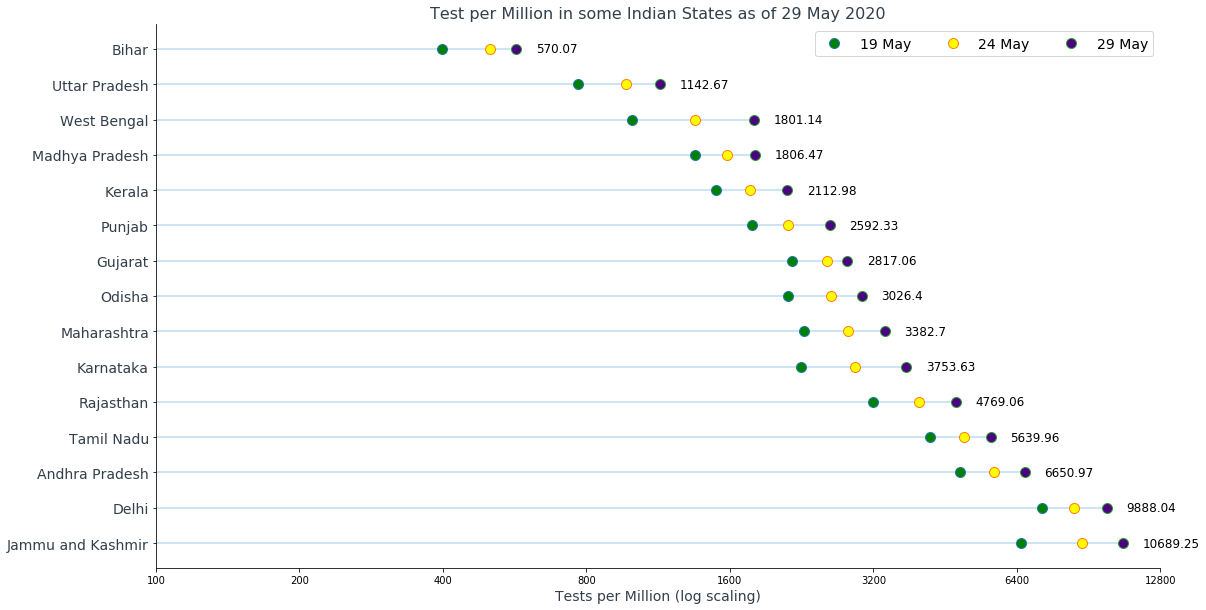

In [ ]:
PlotTPM(list_of_states)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d20f0b1-a95e-4774-951b-ce52162787ce' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>